In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df = pd.read_csv("Automobile.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

## Histogram

- A **histogram** is a univariate plot which helps us understand the distribution of a continuous numerical variable.
- It breaks the range of the continuous variables into a intervals of equal length and then counts the number of observations in each interval.
- We will use the *histplot()* function of seaborn to create histograms.

<AxesSubplot: xlabel='price', ylabel='Count'>

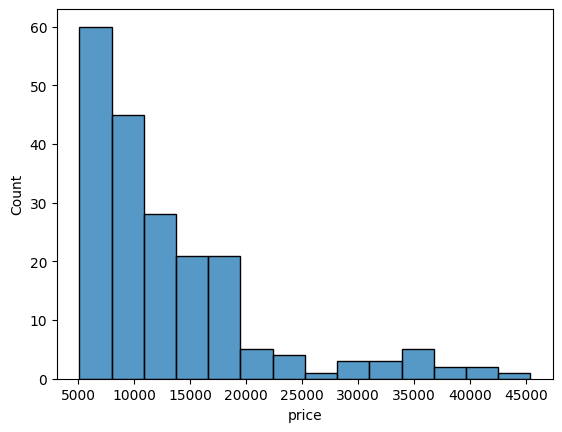

In [6]:
sns.histplot(data=df, x='price')

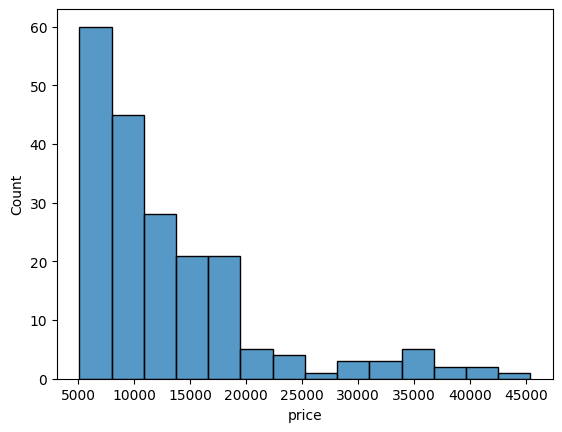

In [11]:
sns.histplot(data=df, x='price');

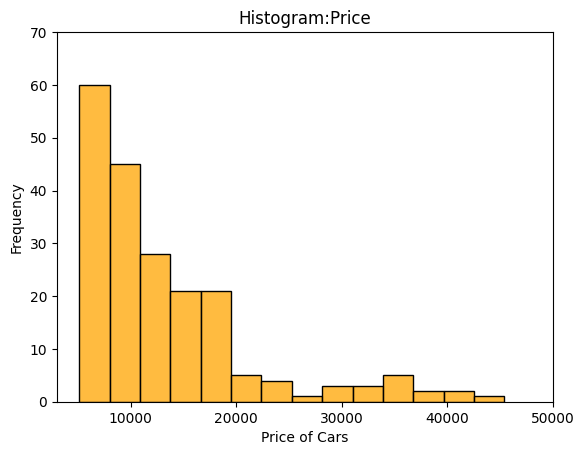

In [13]:
plt.title('Histogram:Price')
plt.xlim(3000, 50000)
plt.ylim(0, 70)
plt.xlabel('Price of Cars')
plt.ylabel('Frequency')
sns.histplot(data=df ,x ='price',color='orange');

**We can specify the number of intervals (or groups or bins) to create by setting the *bins* parameter.**

- If not specified it is passed to [numpy.histogram_bin_edges()](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges)

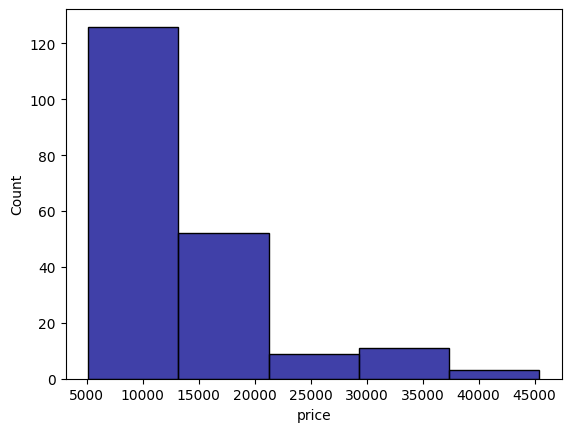

In [18]:
sns.histplot(data=df ,x='price',color="darkblue", bins=5);

**If we want to specify the width of the intervals (or groups or bins), we can use *binwidth* parameter.**

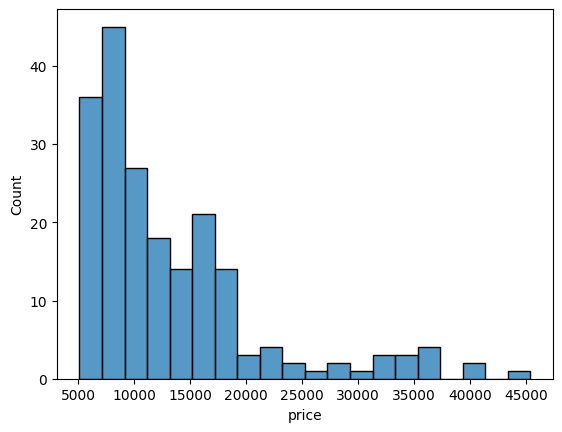

In [21]:
sns.histplot(data=df, x='price', bins=20);

**If we want to specify the width of the intervals (or groups or bins), we can use *binwidth* parameter.**

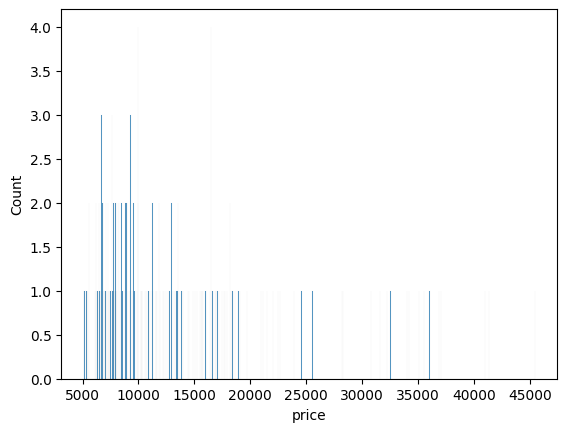

In [23]:
sns.histplot(data=df, x='price', binwidth=20);

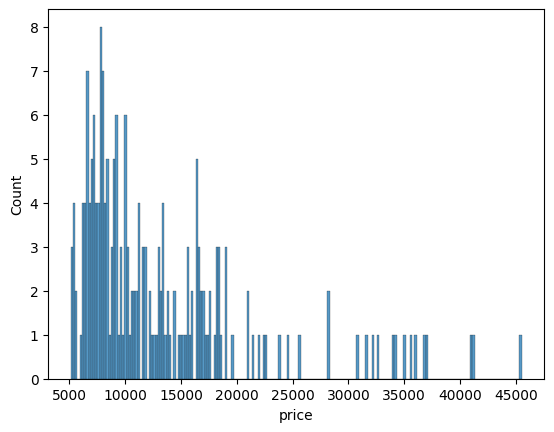

In [24]:
sns.histplot(data=df, x='price', binwidth=200);

**How to find the optimal number of bins: Rule of thumb**

- We calculate the bin-width first, using the following formula: $$ binwidth =\frac{(2 * IQR)}{\sqrt[3]{n}} $$ where n = number of rows the dataset

- Then, we obtain bins using the calculated bin-width. $$ bins =\frac{Range}{binwidth} $$

**In addition to the bars, we can also add a density estimate by setting the *kde* parameter to *True*.**

- **Kernel Density Estimation**, or **KDE**, visualizes the distribution of data over a continuous interval. 
- The conventional scale for KDE is: **Total frequency of each bin × Probability**

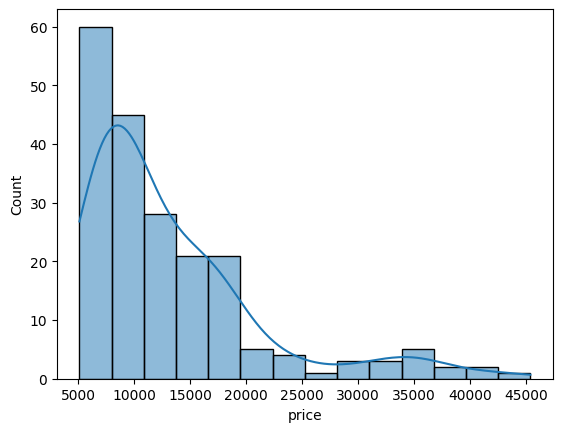

In [25]:
sns.histplot(data=df, x='price', kde = True);

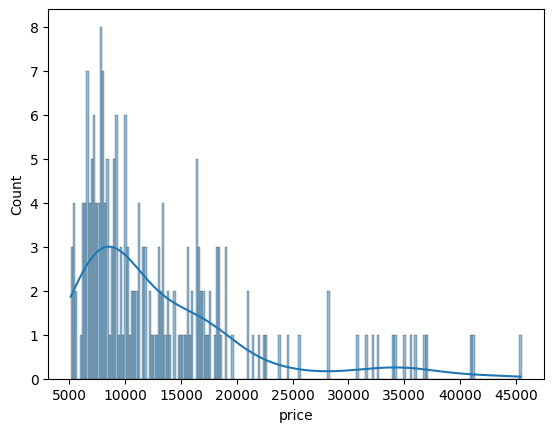

In [30]:
sns.histplot(data=df, x='price', bins = 20, binwidth= 200, kde = True);

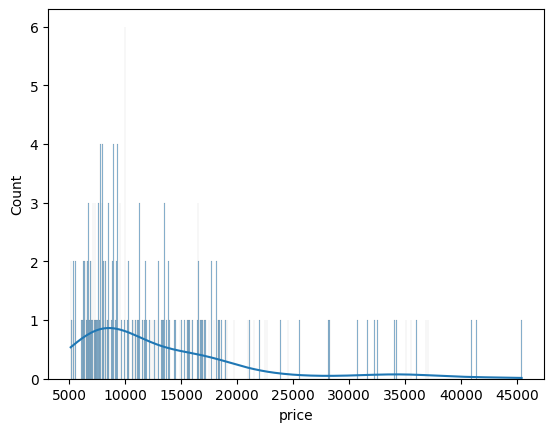

In [32]:
sns.histplot(data=df, x='price', bins=700, kde=True);

Clearly, if we increase the number of bins, it reduces the frequency count in each group (bin). Since the scale of KDE depends on the total frequency of each bin (group), the above code gives us a flattened KDE plot.

**Let's check out the histograms for a few more attributes in the data.**

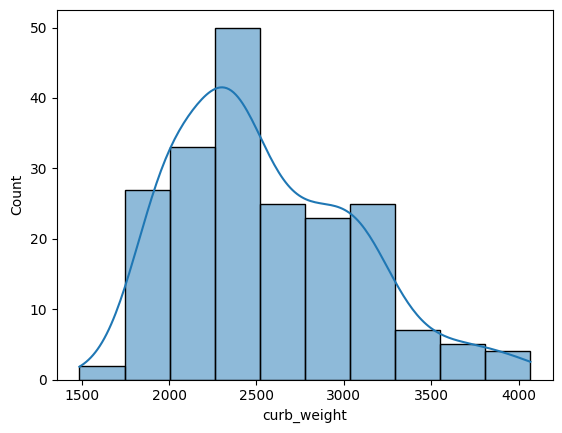

In [35]:
sns.histplot(data=df, x='curb_weight', kde =True);

- A histogram is said to be **symmetric** if the left-hand and right-hand sides resemble mirror images of each other when the histogram is cut down the middle.

<AxesSubplot: xlabel='horsepower', ylabel='Count'>

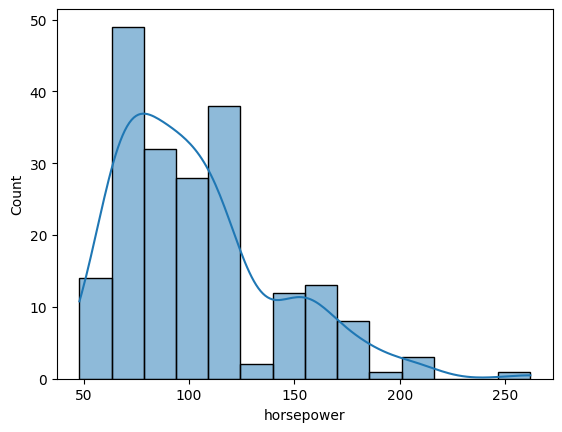

In [36]:
sns.histplot(data=df, x='horsepower', kde=True);

- The tallest clusters of bars, i.e., peaks, in a histogram represent the **modes** of the data.
- A histogram **skewed to the right** has a large number of occurrences on the left side of the plot and a few on the right side of the plot.
- Similarly, a histogram **skewed to the left** has a large number of occurrences on the right side of the plot and few on the left side of the plot.

**Histograms are intuitive but it is hardly a good choice when we want to compare the distributions of several groups. For example,**

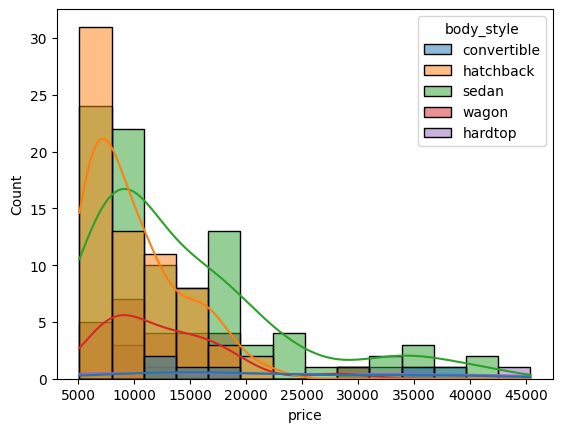

In [37]:
sns.histplot(data=df, x='price', hue='body_style', kde=True);

It might be better to use subplots. We can make use of Facet Grid Style of Plot.

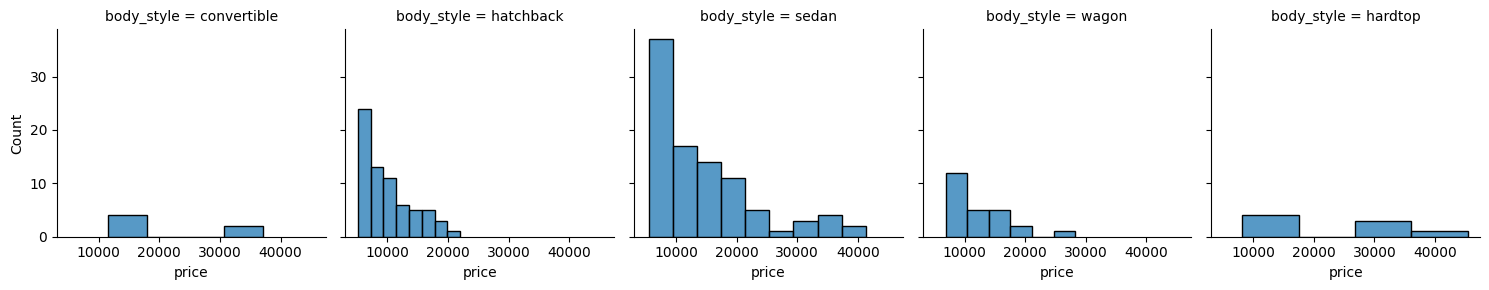

In [39]:
g = sns.FacetGrid(df, col='body_style')
g.map(sns.histplot, "price");

In such cases, we can use **boxplots**. Boxplots, or box-and-whiskers plots, are an excellent way to visualize differences among groups.